In [ ]:
# Importing Needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score

In [ ]:
a = [2,4,4,5,13,4,5,6]
b = [1,1,1,1,1]

def convol_mean(data,size=3):
  one = [1/size]*size
  con_data_s = convol(one,data,mode='same')
  con_data_v = convol(one,data,mode='valid')
  con_data_s[0:int(size/2)] = con_data_v[0]
  con_data_s[-1:int(-(size/2+1)):-1] = con_data_v[-1]
  return con_data_s


def convol(a,b,mode='full'):

  if len(a)>len(b):
    tmp=a
    a=b
    b=tmp

  c = len(a)
  tmp = []

  tmp.extend([0]*c)  #在前面補0 算padding
  tmp.extend(b)     #中間是被data
  tmp.extend([0]*c)  #在後面補0 算padding


  con = [0]*(len(tmp)-len(a)+1) #總隔數 - (捲機a個數 - 1)

  a = a[::-1] #把捲機array倒過來
 
  for i in range(len(con)):
    for j in range(c):
      con[i] += a[j] * tmp[i+j]
  

  if mode == 'full':
    con = con[1:-1]
  elif mode == 'same':
    l = max(len(a),len(b))
    start = round((len(con) - l)/2)
    con = con[start:start+l]
  elif mode == 'valid':
    start = c
    con = con[c:-c]

  return con



d = convol(a,b,mode='full')

print(d)

[2, 6, 10, 15, 28, 30, 31, 33, 28, 15, 11, 6]


In [ ]:
a=[1,2,3,4,5]
print(a[:3:-1])

[5]


In [ ]:
#colab上傳檔案
from google.colab import files
upload = files.upload()

Saving train_knn.csv to train_knn.csv


In [ ]:
#第一題
df = pd.read_csv("HousePrice.csv")
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#第二題
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#第三題

df.isnull().sum()


ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

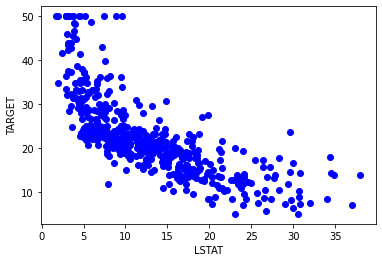

In [ ]:
#第四題
df_3 = df[['LSTAT','TARGET']]
plt.scatter(df_3.LSTAT, df_3.TARGET, color='blue')
plt.xlabel("LSTAT")
plt.ylabel("TARGET")
plt.show()

Coefficients:  [[-0.95004935]]
Intercept:  [34.55384088]


Text(0, 0.5, 'TARGET')

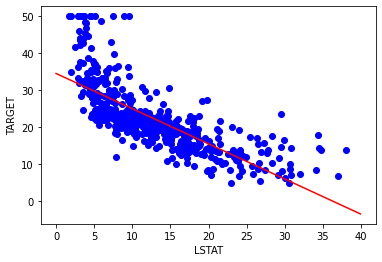

In [ ]:
#第五題

df_3 = df[['LSTAT','TARGET']]
train_x = np.asanyarray(df_3[['LSTAT']])
train_y = np.asanyarray(df_3[['TARGET']])
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(df_3.LSTAT, df_3.TARGET,  color='blue')
XX = np.arange(0.0, 40.0, 0.1)
YY = regr.coef_[0][0]*XX+regr.intercept_[0]
plt.plot(XX, YY, '-r' )
plt.xlabel("LSTAT")
plt.ylabel("TARGET")

Coefficients:  [[ 0.         -2.3328211   0.04354689]]
Intercept:  [42.86200733]


Text(0, 0.5, 'TARGET')

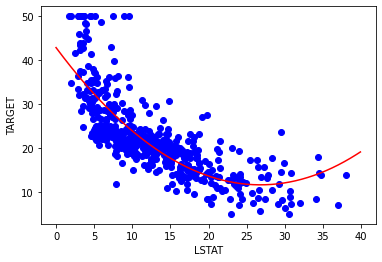

In [ ]:
#第六題
df_3 = df[['LSTAT','TARGET']]

train_x = np.asanyarray(df_3[['LSTAT']])
train_y = np.asanyarray(df_3[['TARGET']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
regr = linear_model.LinearRegression()
regr.fit(train_x_poly,train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(df_3.LSTAT, df_3.TARGET,  color='blue')

XX = np.arange(0.0, 40.0, 0.1)
YY = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, YY, '-r' )
plt.xlabel("LSTAT")
plt.ylabel("TARGET")


Coefficients:  [[-0.91138652 -0.07044915]]
Intercept:  [34.31920729]


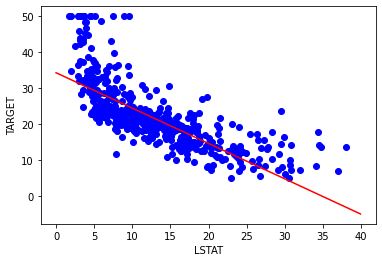

Text(0, 0.5, 'TARGET')

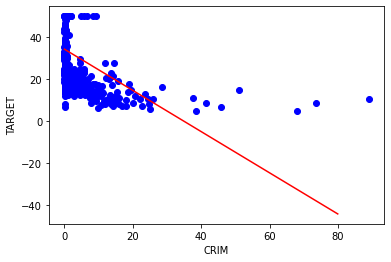

In [ ]:
#第七題

df_4 = df[['LSTAT','CRIM']]
train_x = np.asanyarray(df_4)
train_y = np.asanyarray(df[['TARGET']])
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(df.LSTAT, df.TARGET, color='blue')
XX = np.arange(0.0, 40.0, 0.1)
YY = regr.coef_[0][0]*XX+regr.coef_[0][1]*XX+regr.intercept_[0]
plt.plot(XX, YY, '-r' )
plt.xlabel("LSTAT")
plt.ylabel("TARGET")
plt.show()

plt.scatter(df.CRIM, df.TARGET, color='blue')
XX = np.arange(0.0, 80.0, 0.1)
YY = regr.coef_[0][0]*XX+regr.coef_[0][1]*XX+regr.intercept_[0]
plt.plot(XX, YY, '-r' )
plt.xlabel("CRIM")
plt.ylabel("TARGET")


In [ ]:
#第八題
df_Tit_test = pd.read_csv("Titanic_test.csv")
df_Tit_train = pd.read_csv("Titanic_train.csv")

#接起來
df_conc = pd.concat([df_Tit_test,df_Tit_train],axis=0)
#增加欄位分辨輸出csv
df_conc[["train/test"]]=""
df_conc.loc[df_conc.Age.isnull(),"train/test"] = "test"
df_conc.loc[~df_conc.Age.isnull(),"train/test"] = "train"

#算fare平均
df_conc_m = df_conc.Fare.loc[df_conc.Fare!=0]
mean_fare = df_conc_m.mean()

#填空值
df_conc.Fare = df_conc.Fare.fillna(mean_fare)
df_conc.Embarked = df_conc.Embarked.fillna("C")

#補零
df_conc.Fare = df_conc.Fare.replace(0,mean_fare)

#onehot encoding
df_train = df_conc[["Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]
df_train = pd.get_dummies(df_train)


#Age非空的資料
df_traindata = df_train.loc[~df_train.Age.isnull()]
#資料切分
#msk = np.random.rand(len(df_traindata)) < 0.8
#train = df_traindata[msk]
#test = df_traindata[~msk]
#train_x = np.asanyarray(train[["Pclass","Sex_female","Sex_male","SibSp","Parch","Fare","Embarked_C","Embarked_Q","Embarked_S"]])
#train_y = np.asanyarray(train["Age"])
#test_x = np.asanyarray(test[["Pclass","Sex_female","Sex_male","SibSp","Parch","Fare","Embarked_C","Embarked_Q","Embarked_S"]])
#test_y = np.asanyarray(test["Age"])

df_traindata_x = np.asanyarray(df_traindata[["Pclass","Sex_female","Sex_male","SibSp","Parch","Fare","Embarked_C","Embarked_Q","Embarked_S"]])
df_traindata_y = np.asanyarray(df_traindata["Age"])

train_x, test_x, train_y, test_y = train_test_split(df_traindata_x, df_traindata_y, test_size=0.2)

#label轉成int
train_y = np.array(train_y, dtype=int)
test_y = np.array(test_y, dtype=int)
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
#預測Age值
df_Ageze = df_train.loc[df_train.Age.isnull()]
df_Ageze_x = np.asanyarray(df_Ageze[["Pclass","Sex_female","Sex_male","SibSp","Parch","Fare","Embarked_C","Embarked_Q","Embarked_S"]])
df_Ageze_y = knn.predict(df_Ageze_x)
#填Age值
df_conc.loc[df_train.Age.isnull(),"Age"] = df_Ageze_y
#輸出csv
train_test = df_conc.groupby("train/test")
train_test.get_group("test").to_csv('test_knn.csv', index=False)
train_test.get_group("train").to_csv('train_knn.csv', index=False)

out_8 = train_test.get_group("train")

#files.download('test_knn.csv')
#files.download('train_knn.csv')

In [ ]:
df_Tit_test = pd.read_csv("Titanic_test.csv")
df_Tit_train = pd.read_csv("Titanic_train.csv")

#接起來
df_conc = pd.concat([df_Tit_test,df_Tit_train],axis=0)
#增加欄位分辨輸出csv
df_conc[["train/test"]]=""
df_conc.loc[df_conc.Age.isnull(),"train/test"] = "test"
df_conc.loc[~df_conc.Age.isnull(),"train/test"] = "train"

#算fare平均
df_conc_m = df_conc.Fare.loc[df_conc.Fare!=0]
mean_fare = df_conc_m.mean()

#填空值
df_conc.Fare = df_conc.Fare.fillna(mean_fare)
df_conc.Embarked = df_conc.Embarked.fillna("C")

#補零
df_conc.Fare = df_conc.Fare.replace(0,mean_fare)
#onehot encoding
df_train = df_conc[["Age","Pclass","Sex","SibSp","Parch","Fare","Embarked"]]
df_train = pd.get_dummies(df_train)

imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(df_train)

df_x = df_train[["Pclass","SibSp","Parch","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]
#f_x = pd.get_dummies(df_x)
df_y = df_train["Age"]
x_train, x_test, y_train, y_test = train_test_split(df_x.values, df_y.values, test_size=0.3)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

#knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
score_knn = accuracy_score(y_test, y_pred_knn)
print("score_knn: ",score_knn)
#svm
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
score_svm = accuracy_score(y_test, y_pred_svm)
print("score_svm: ",score_svm)
#GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred_GNB = GNB.predict(x_test)
score_GNB = accuracy_score(y_test, y_pred_GNB)
print("score_GNB: ",score_GNB)

score_knn:  0.20610687022900764
score_svm:  0.22137404580152673
score_GNB:  0.015267175572519083


In [ ]:
df_conc.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Survived        418
train/test        0
dtype: int64

In [ ]:
df_train

,Age,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,3,0,0,7.8292,0,1,0,1,0
1,47.0,3,1,0,7.0000,1,0,0,0,1
2,62.0,2,0,0,9.6875,0,1,0,1,0
3,27.0,3,0,0,8.6625,0,1,0,0,1
4,22.0,3,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,2,0,0,13.0000,0,1,0,0,1
887,19.0,1,0,0,30.0000,1,0,0,0,1
888,NaN,3,1,2,23.4500,1,0,0,0,1
889,26.0,1,0,0,30.0000,0,1,1,0,0


In [ ]:
df_train.isnull().sum()

Age           263
Pclass          0
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [ ]:
#accuracy
testTarget = knn.predict(test_x)
nErrors = (test_y != testTarget).sum()
accuracy = 1.0 - nErrors / testTarget.shape[0]
print("Accuracy: ", accuracy)
#mae
mae_pre = np.mean(np.absolute(testTarget - test_y))
mae_mean = np.mean(np.absolute(np.mean(train_y) - test_y))
print("mae_pre: ", mae_pre)
print(accuracy_score(test_y, testTarget))
print("mae_mean: ", mae_mean)
tr = test_y-test_y+np.mean(train_y)
tr = np.array(tr, dtype=int)
print(accuracy_score(test_y, tr))


Accuracy:  0.20610687022900764
mae_pre:  3.2152721858755835e+18
0.20610687022900764
mae_mean:  1.85406206338811e+18
0.0


In [ ]:
#第九題
df_44 = pd.read_csv("train_knn.csv")

#df_44 = out_8
df_4 = df_44.loc[df_44.Survived.notnull()]
df_x = df_4[["Pclass","Sex","SibSp","Parch","Fare","Embarked","Age"]]
df_x = pd.get_dummies(df_x)
df_y = df_4["Survived"]
x_train, x_test, y_train, y_test = train_test_split(df_x.values, df_y.values, test_size=0.3)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)
#knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
score_knn = accuracy_score(y_test, y_pred_knn)
print("score_knn: ",score_knn)
#f_score
f_score = f1_score(y_test, y_pred_knn, average='binary')
print("f_score: ",f_score)
#svm
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
score_svm = accuracy_score(y_test, y_pred_svm)
print("score_svm: ",score_svm)
#f_score
f_score = f1_score(y_test, y_pred_svm, average='binary')
print("f_score: ",f_score)
#GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred_GNB = GNB.predict(x_test)
score_GNB = accuracy_score(y_test, y_pred_GNB)
print("score_GNB: ",score_GNB)
#f_score
f_score = f1_score(y_test, y_pred_GNB, average='binary')
print("f_score: ",f_score)

NameError: ignored

In [ ]:
df_conc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,train/test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,train
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,train
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,train
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,train
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,train
